In [1]:
from sklearn.cluster import KMeans

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from matplotlib import pyplot as plt

In [4]:
import pandas as pd

In [5]:
df =pd.read_csv("income.csv")

In [7]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [9]:
df.columns[df.isna().any()]

Index([], dtype='object')

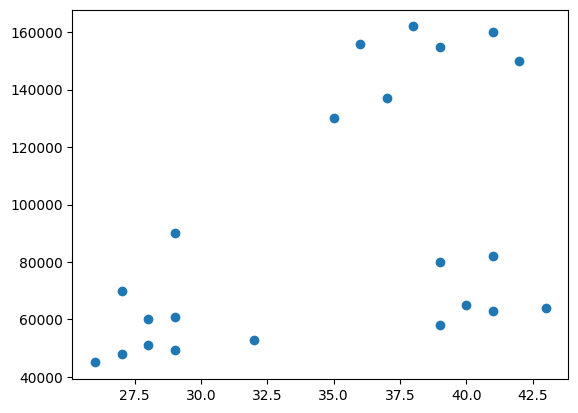

In [10]:
plt.scatter(df.Age,df['Income($)'])

In [21]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [23]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [24]:
see=[]
k_r = range(1,10)
for k in k_r:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    see.append(km.inertia_)

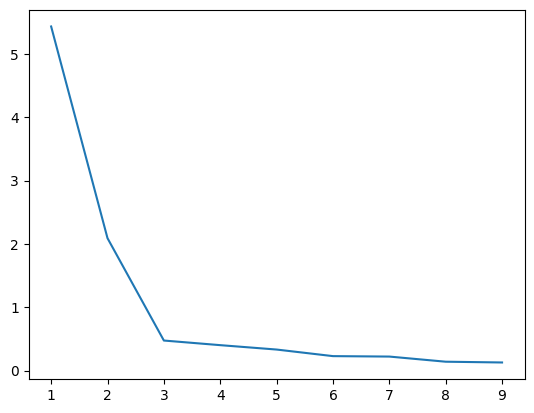

In [25]:
plt.plot(k_r,see)

In [26]:
km = KMeans(n_clusters=3)

In [28]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [29]:
df['class'] = y_predicted

In [30]:
df

,Name,Age,Income($),class
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


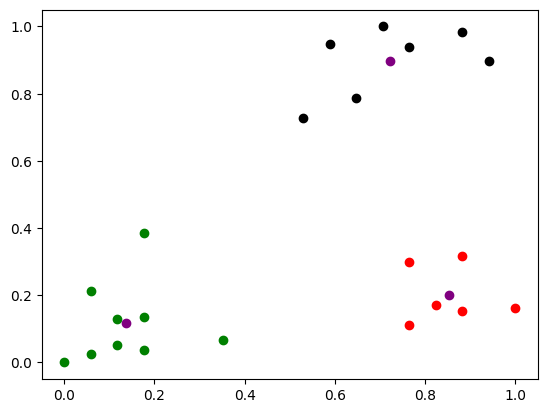

In [32]:
df1 = df[df['class'] == 0]
df2 = df[df['class'] == 1]
df3 = df[df['class'] == 2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple')
